In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

# Full Linear Regression Analysis

Analyze the data in auto-mpg.csv using a multifactor approach, including interation terms.

1. Plot MPG vs. each of the other factors in the data set.
2. Clean the data.
3. Create normalized column data for each of the factors.
4. Create and fit a linear regression model that just includes the linear terms. Then create a column in the data frame for the predictions and residuals of this model.
5. Remove any terms in the model that are not statistically significant and refit the model.
6. Add in the interaction terms.
7. Fit the data with this model, create predictions, residuals, histogram of residuals, and standard deviation of residuals.
8. Remove all terms that are not statistically significant and refit the model.

In [2]:
# Get the data
auto_mpg = pd.read_csv('auto-mpg.csv')
print(auto_mpg.head())
print(auto_mpg.columns)

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  
Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')


In [3]:
# get data from each column, 9 columns total
mpg = auto_mpg["mpg"]
# print(type(mpg))
cylinders = auto_mpg["cylinders"]
displacement = auto_mpg["displacement"]
horsepower = auto_mpg["horsepower"]
weight = auto_mpg["weight"]
acceleration = auto_mpg["acceleration"]
model_year = auto_mpg["model year"]
origin = auto_mpg["origin"]
car_name = auto_mpg["car name"]

# print(cylinders)
# print(displacement)
# print(horsepower)
# print(weight)
# print(acceleration)
# print(model_year)
# print(origin)
# print(car_name)

Text(0, 0.5, 'MPG')

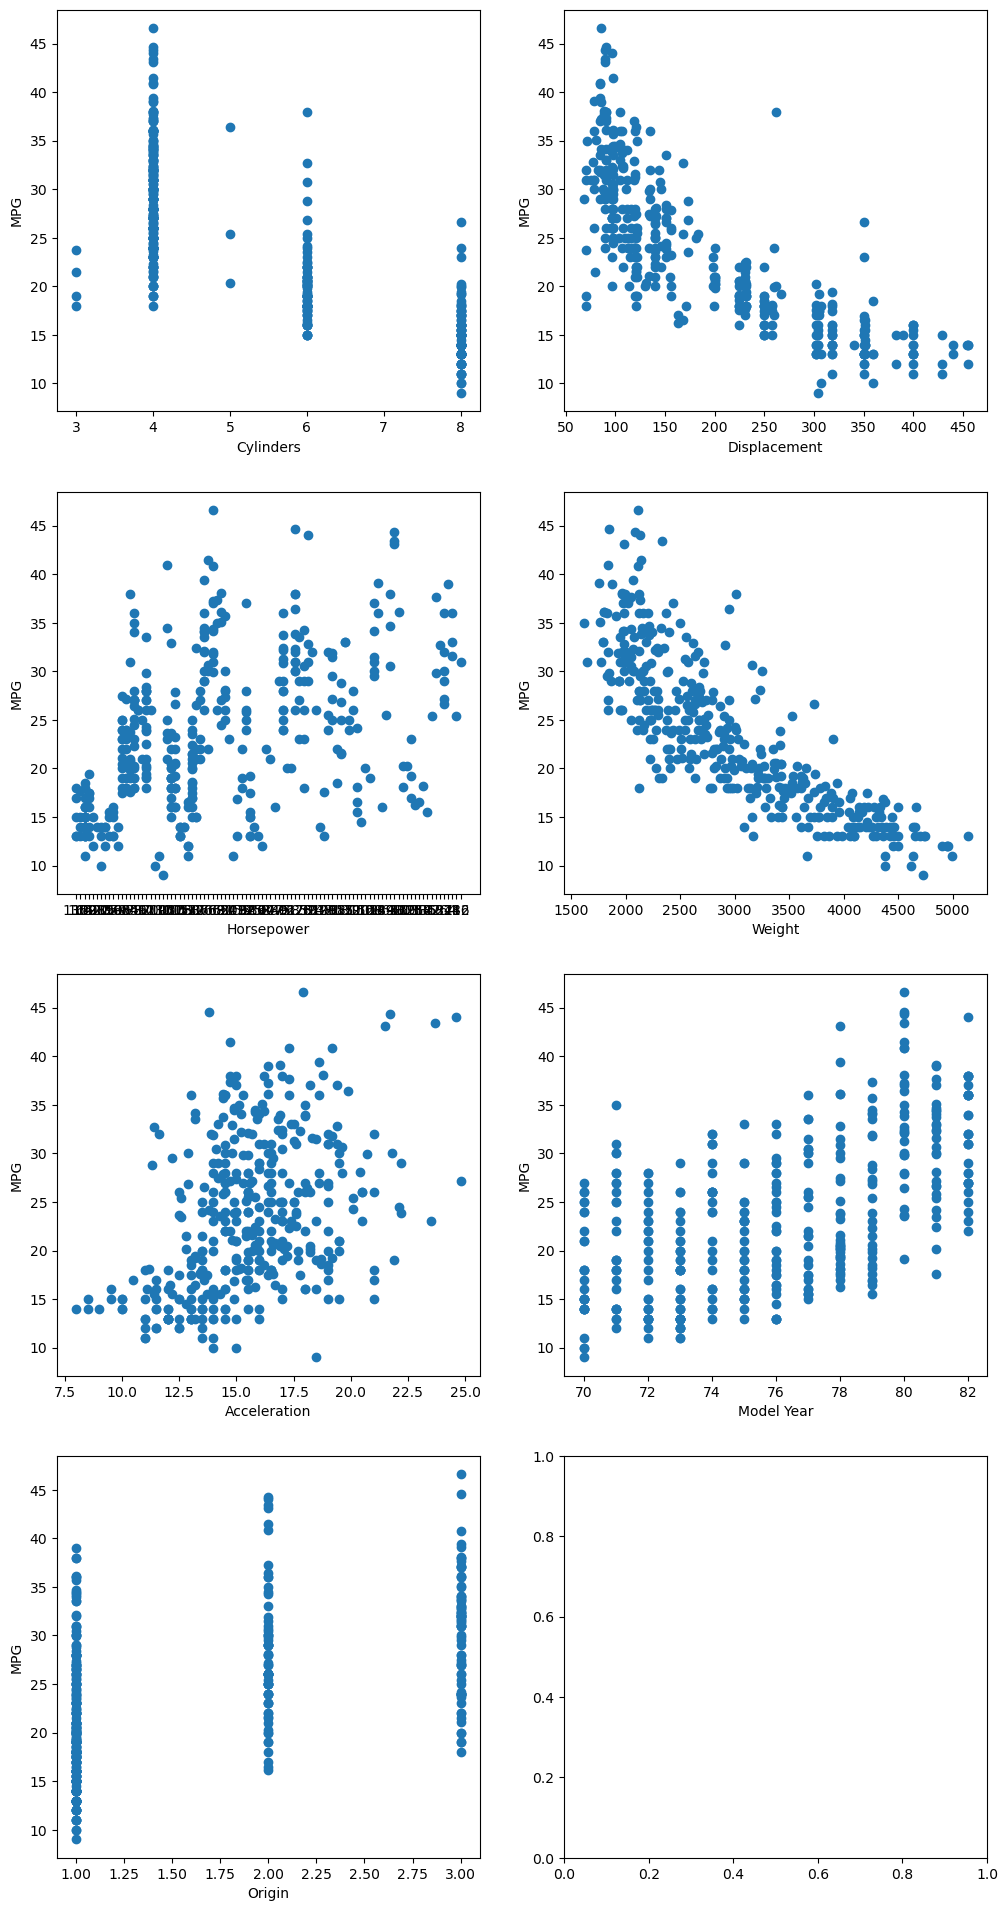

In [4]:
# create plots of mpg vs. each variable
fig, ax = plt.subplots(4, 2, figsize=(12,24))
ax[0][0].plot(cylinders, mpg, 'o', label = "Data")
ax[0][0].set_xlabel('Cylinders')
ax[0][0].set_ylabel('MPG')

ax[0][1].plot(displacement, mpg, 'o', label = "Data")
ax[0][1].set_xlabel('Displacement')
ax[0][1].set_ylabel('MPG')

ax[1][0].plot(horsepower, mpg, 'o', label = "Data")
ax[1][0].set_xlabel('Horsepower')
ax[1][0].set_ylabel('MPG')

ax[1][1].plot(weight, mpg, 'o', label = "Data")
ax[1][1].set_xlabel('Weight')
ax[1][1].set_ylabel('MPG')

ax[2][0].plot(acceleration, mpg, 'o', label = "Data")
ax[2][0].set_xlabel('Acceleration')
ax[2][0].set_ylabel('MPG')

ax[2][1].plot(model_year, mpg, 'o', label = "Data")
ax[2][1].set_xlabel('Model Year')
ax[2][1].set_ylabel('MPG')

ax[3][0].plot(origin, mpg, 'o', label = "Data")
ax[3][0].set_xlabel('Origin')
ax[3][0].set_ylabel('MPG')

# string data for car names, can't plot yet
# ax[3][1].plot(car_name, mpg, 'o', label = "Data")
# ax[3][1].set_xlabel('Car Name')
# ax[3][1].set_ylabel('MPG')

In [5]:
# cleaning the data, need to check for non-numerical values
mpg_count = 0
cylinders_count = 0
displacement_count = 0
horsepower_count = 0
weight_count = 0
acceleration_count = 0
model_year_count = 0
origin_count = 0
car_name_count = 0

for i in range(len(mpg)):
    if not isinstance(mpg[i], (int, float, np.int64)):
        mpg_count += 1
    if not isinstance(cylinders[i], (int, float, np.int64)):
        cylinders_count += 1
    if not isinstance(displacement[i], (int, float, np.int64)):
        displacement_count += 1
    if not isinstance(horsepower[i], (int, float,np.int64)):
        horsepower_count += 1
    if not isinstance(weight[i], (int, float, np.int64)):
        weight_count += 1
    if not isinstance(acceleration[i], (int, float, np.int64)):
        acceleration_count += 1
    if not isinstance(model_year[i], (int, float, np.int64)):
        model_year_count += 1
    if not isinstance(origin[i], (int, float, np.int64)):
        origin_count += 1
    if not isinstance(car_name[i], (int, float, np.int64)):
        car_name_count += 1

print("mpg", mpg_count)
print("cylinders", cylinders_count)
print("displacement", displacement_count)
print("horsepower", horsepower_count)
print("weight", weight_count)
print("acceleration", acceleration_count)
print("model year", model_year_count)
print("origin", origin_count)
print("car name", car_name_count)
# horsepower and car name both have string values

mpg 0
cylinders 0
displacement 0
horsepower 398
weight 0
acceleration 0
model year 0
origin 0
car name 398


In [6]:
# convert horsepower to numerical values
horsepower = pd.to_numeric(horsepower, errors="coerce")
print(horsepower.isnull().sum())
# there are 6 nan values in horsepower
# replace all nan values with median horsepower value
# horsepower_median = horsepower.median()
horsepower = horsepower.fillna(horsepower.median())
print(horsepower.isnull().sum())

6
0


In [7]:
# print(car_name)
# determine how many different car names there are
car_name_unique = pd.unique(car_name)
# print(len(car_name_unique))

# assign each car name a number
car_name_dict = {}
count = 0
for name in car_name_unique:
    car_name_dict[name] = count
    count += 1

# replace each car name with a number
car_name = car_name.map(car_name_dict)
# print(car_name)

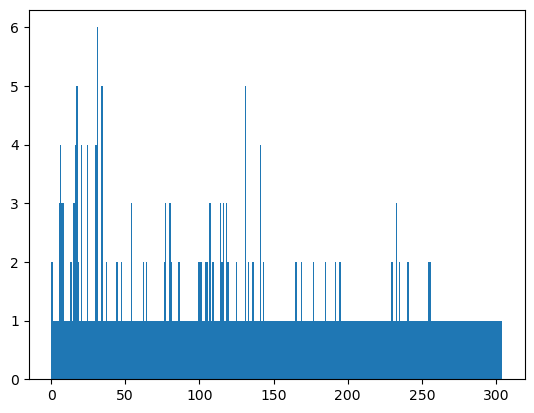

In [8]:
# create histogram of the 305 different car names
car_name_hist = plt.hist(car_name, bins=305)

Text(0, 0.5, 'MPG')

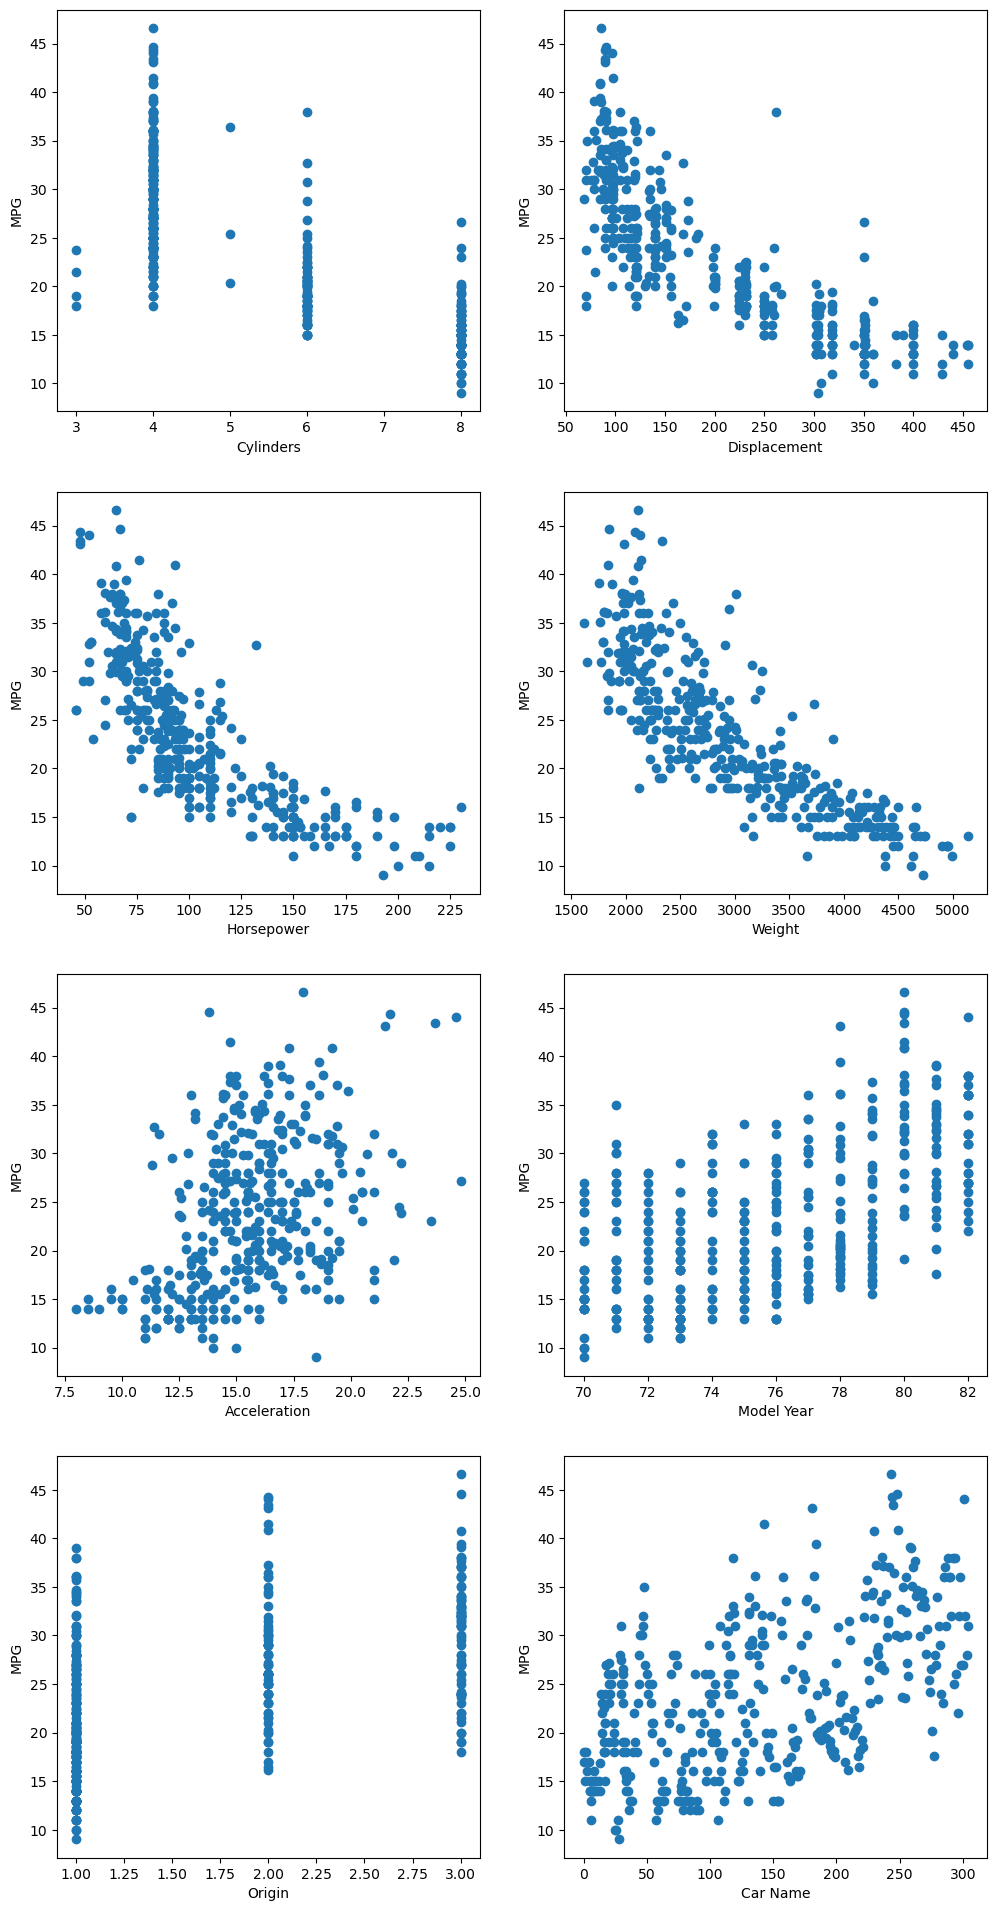

In [9]:
# recreate plots of mpg vs. each variable now that all data is numerical
fig, ax = plt.subplots(4, 2, figsize=(12,24))
ax[0][0].plot(cylinders, mpg, 'o', label = "Data")
ax[0][0].set_xlabel('Cylinders')
ax[0][0].set_ylabel('MPG')

ax[0][1].plot(displacement, mpg, 'o', label = "Data")
ax[0][1].set_xlabel('Displacement')
ax[0][1].set_ylabel('MPG')

ax[1][0].plot(horsepower, mpg, 'o', label = "Data")
ax[1][0].set_xlabel('Horsepower')
ax[1][0].set_ylabel('MPG')

ax[1][1].plot(weight, mpg, 'o', label = "Data")
ax[1][1].set_xlabel('Weight')
ax[1][1].set_ylabel('MPG')

ax[2][0].plot(acceleration, mpg, 'o', label = "Data")
ax[2][0].set_xlabel('Acceleration')
ax[2][0].set_ylabel('MPG')

ax[2][1].plot(model_year, mpg, 'o', label = "Data")
ax[2][1].set_xlabel('Model Year')
ax[2][1].set_ylabel('MPG')

ax[3][0].plot(origin, mpg, 'o', label = "Data")
ax[3][0].set_xlabel('Origin')
ax[3][0].set_ylabel('MPG')

ax[3][1].plot(car_name, mpg, 'o', label = "Data")
ax[3][1].set_xlabel('Car Name')
ax[3][1].set_ylabel('MPG')

In [10]:
# normalize the data
# height_data['Gender_Normalized'] = (height_data['GenderValue'] - height_data['GenderValue'].mean()) / height_data['GenderValue'].std()
cylinders_norm = (cylinders - cylinders.mean()) / cylinders.std()
displacement_norm = (displacement - displacement.mean()) / displacement.std()
horsepower_norm = (horsepower - horsepower.mean()) / horsepower.std()
weight_norm = (weight - weight.mean()) / weight.std()
acceleration_norm = (acceleration - acceleration.mean()) / acceleration.std()
model_year_norm = (model_year - model_year.mean()) / model_year.std()
origin_norm = (origin - origin.mean()) / origin.std()
car_name_norm = (car_name - car_name.mean()) / car_name.std()

# add normalized data to auto mpg data frame
auto_mpg["cylinders_norm"] = cylinders_norm
auto_mpg["displacement_norm"] = displacement_norm
auto_mpg["horsepower_norm"] = horsepower_norm
auto_mpg["weight_norm"] = weight_norm
auto_mpg["acceleration_norm"] = acceleration_norm
auto_mpg["model_year_norm"] = model_year_norm
auto_mpg["origin_norm"] = origin_norm
auto_mpg["car_name_norm"] = car_name_norm

Text(0, 0.5, 'MPG')

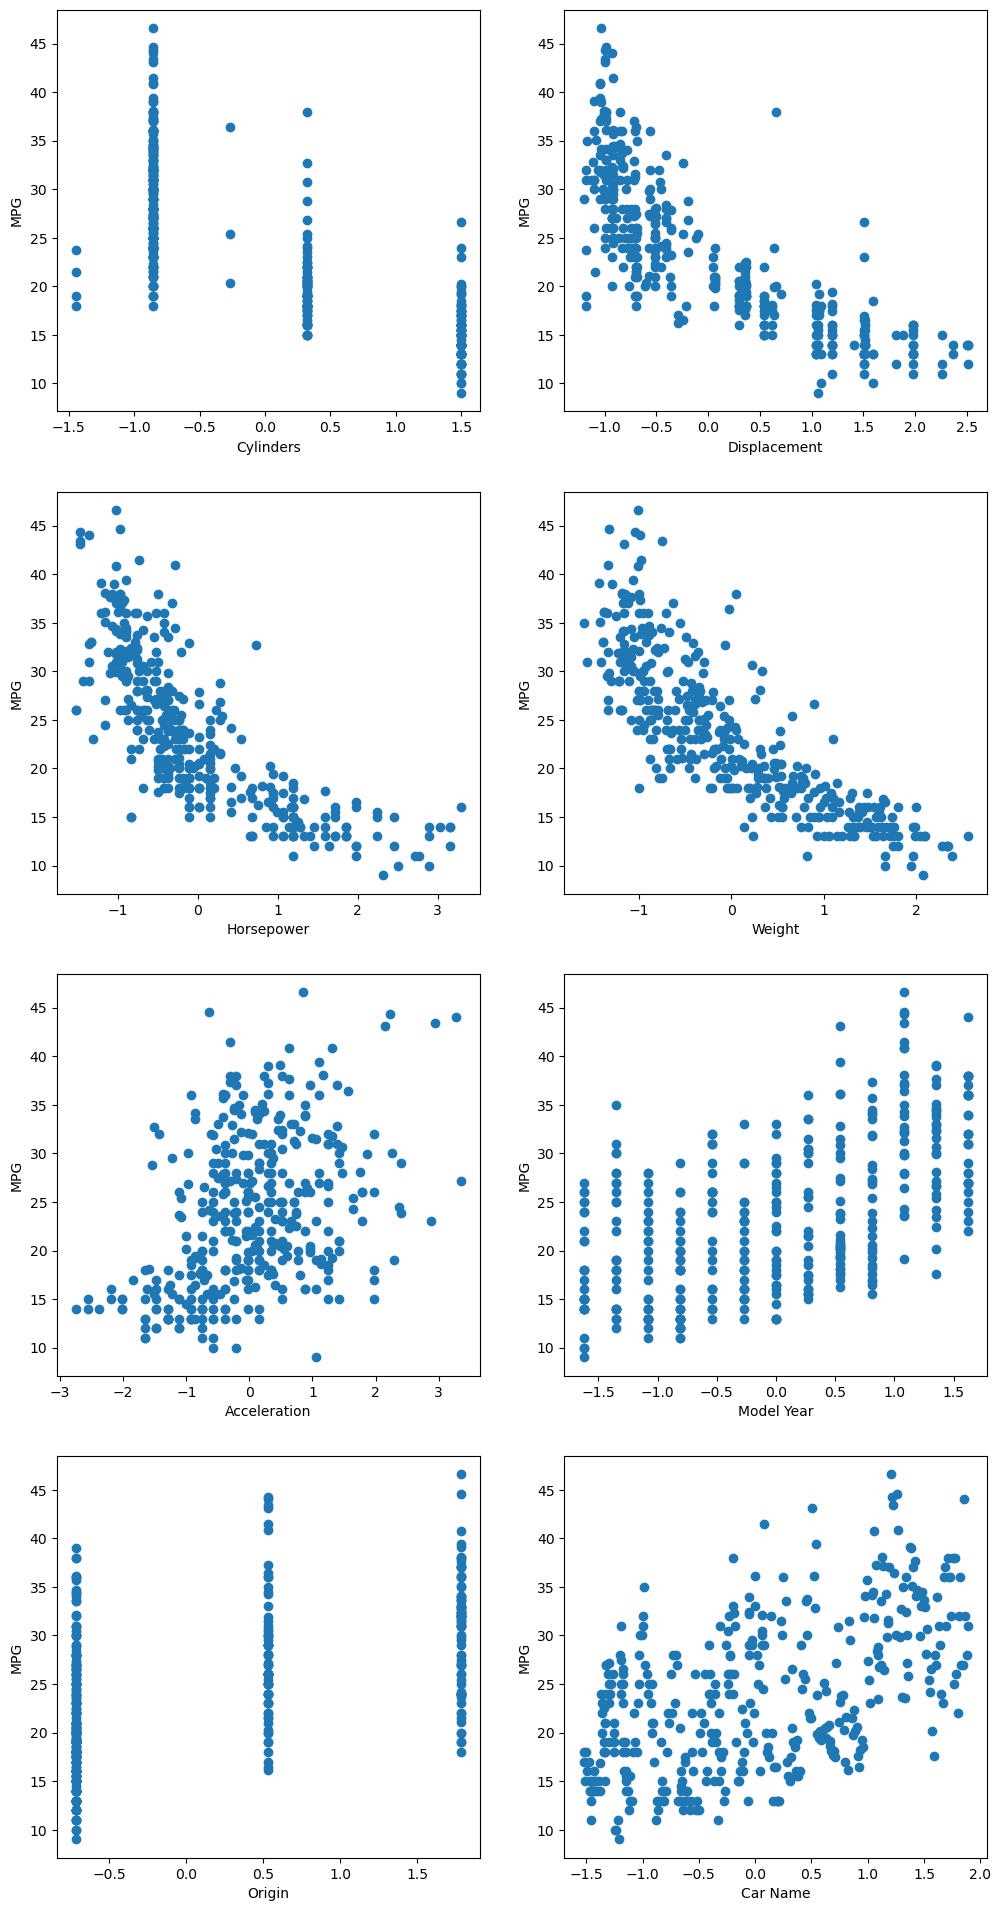

In [11]:
# graph normalized data
fig, ax = plt.subplots(4, 2, figsize=(12,24))
ax[0][0].plot(cylinders_norm, mpg, 'o', label = "Data")
ax[0][0].set_xlabel('Cylinders')
ax[0][0].set_ylabel('MPG')

ax[0][1].plot(displacement_norm, mpg, 'o', label = "Data")
ax[0][1].set_xlabel('Displacement')
ax[0][1].set_ylabel('MPG')

ax[1][0].plot(horsepower_norm, mpg, 'o', label = "Data")
ax[1][0].set_xlabel('Horsepower')
ax[1][0].set_ylabel('MPG')

ax[1][1].plot(weight_norm, mpg, 'o', label = "Data")
ax[1][1].set_xlabel('Weight')
ax[1][1].set_ylabel('MPG')

ax[2][0].plot(acceleration_norm, mpg, 'o', label = "Data")
ax[2][0].set_xlabel('Acceleration')
ax[2][0].set_ylabel('MPG')

ax[2][1].plot(model_year_norm, mpg, 'o', label = "Data")
ax[2][1].set_xlabel('Model Year')
ax[2][1].set_ylabel('MPG')

ax[3][0].plot(origin_norm, mpg, 'o', label = "Data")
ax[3][0].set_xlabel('Origin')
ax[3][0].set_ylabel('MPG')

ax[3][1].plot(car_name_norm, mpg, 'o', label = "Data")
ax[3][1].set_xlabel('Car Name')
ax[3][1].set_ylabel('MPG')

In [12]:
# Fit a linear regression model - Height = a0 + a1*Father_Height + a2*Mother_Height + a3*Gender
formula_str = "mpg ~ cylinders_norm + displacement_norm + horsepower_norm + weight_norm + acceleration_norm + model_year_norm + origin_norm + car_name_norm"
model = smf.ols(formula_str, data=auto_mpg)
model = model.fit()

# View model summary
print(model.summary())

# Predict values
mpg_predict = model.predict()

# Add this prediction to the DataFrame
auto_mpg["mpg_predicted"] = mpg_predict
# Add the DIFFERENCE between Height data and prediction to the DataFrame
auto_mpg["mpg_residual"] = auto_mpg["mpg"] - mpg_predict
print(auto_mpg.head())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     224.3
Date:                Wed, 31 Jan 2024   Prob (F-statistic):          1.36e-140
Time:                        16:31:02   Log-Likelihood:                -1039.3
No. Observations:                 398   AIC:                             2097.
Df Residuals:                     389   BIC:                             2133.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            23.5146      0.16

3.299123370310824


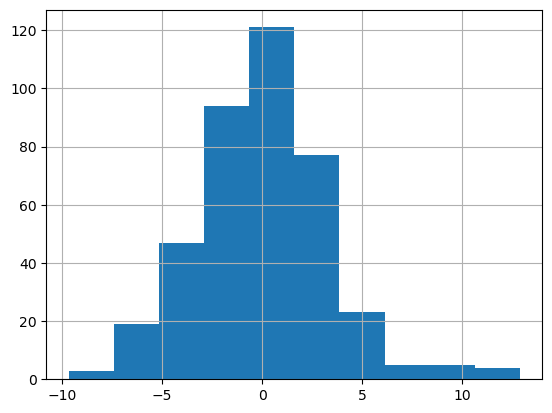

In [13]:
# histogram and standard deviation of residuals
auto_mpg["mpg_residual"].hist()
residual_std = auto_mpg["mpg_residual"].std()
print(residual_std)

In [14]:
# remove terms that aren't statistically significant and refit model
formula_str2 = "mpg ~ displacement_norm + weight_norm + model_year_norm + origin_norm"
model2 = smf.ols(formula_str2, data=auto_mpg)
model2 = model2.fit()
print(model2.summary())

# Predict values
mpg_predict2 = model2.predict()
auto_mpg["mpg_predicted2"] = mpg_predict2
auto_mpg["mpg_residual2"] = auto_mpg["mpg"] - mpg_predict2
# print(auto_mpg.head())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     442.2
Date:                Wed, 31 Jan 2024   Prob (F-statistic):          5.29e-144
Time:                        16:31:04   Log-Likelihood:                -1043.3
No. Observations:                 398   AIC:                             2097.
Df Residuals:                     393   BIC:                             2117.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            23.5146      0.16

In [15]:
# adding interaction terms to the model
interaction1 = " + cylinders_norm*displacement_norm + cylinders_norm*horsepower_norm + cylinders_norm*weight_norm + cylinders_norm*acceleration_norm + cylinders_norm*model_year_norm + cylinders_norm*origin_norm + cylinders_norm*car_name_norm"
interaction2 = " + displacement_norm*horsepower_norm + displacement_norm*weight_norm + displacement_norm*acceleration_norm + displacement_norm*model_year_norm + displacement_norm*origin_norm + displacement_norm*car_name_norm"
interaction3 = " + horsepower_norm*weight_norm + horsepower_norm*acceleration_norm + horsepower_norm*model_year_norm + horsepower_norm*origin_norm + horsepower_norm*car_name_norm"
interaction4 = " + weight_norm*acceleration_norm + weight_norm*model_year_norm + weight_norm*origin_norm + weight_norm*car_name_norm"
interaction5 = " + acceleration_norm*model_year_norm + acceleration_norm*origin_norm + acceleration_norm*car_name_norm"
interaction6 = " + model_year_norm*origin_norm + model_year_norm*car_name_norm"
interaction7 = " + origin_norm*car_name_norm"

formula_str3 = formula_str + interaction1 + interaction2 + interaction3 + interaction4 + interaction5 + interaction6 + interaction7
# print(formula_str3)
model3 = smf.ols(formula_str3, data=auto_mpg)
model3 = model3.fit()
print(model3.summary())

# Predict values
mpg_predict3 = model3.predict()
auto_mpg["mpg_predicted3"] = mpg_predict3
auto_mpg["mpg_residual3"] = auto_mpg["mpg"] - mpg_predict3
# print(auto_mpg.head())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     86.21
Date:                Wed, 31 Jan 2024   Prob (F-statistic):          1.21e-154
Time:                        16:31:05   Log-Likelihood:                -932.56
No. Observations:                 398   AIC:                             1939.
Df Residuals:                     361   BIC:                             2087.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In